# Time Series Analysis 

Significance of Time Series TSA is the backbone for prediction and forecasting analysis, specific to time-based problem statements.

Analyzing the historical dataset and its patterns Understanding and matching the current situation with patterns derived from the previous stage. Understanding the factor or factors influencing certain variable(s) in different periods.

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns  # Import seaborn for color palettes

# Define the directory containing the CSV files
directory = 'harth2'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Medians

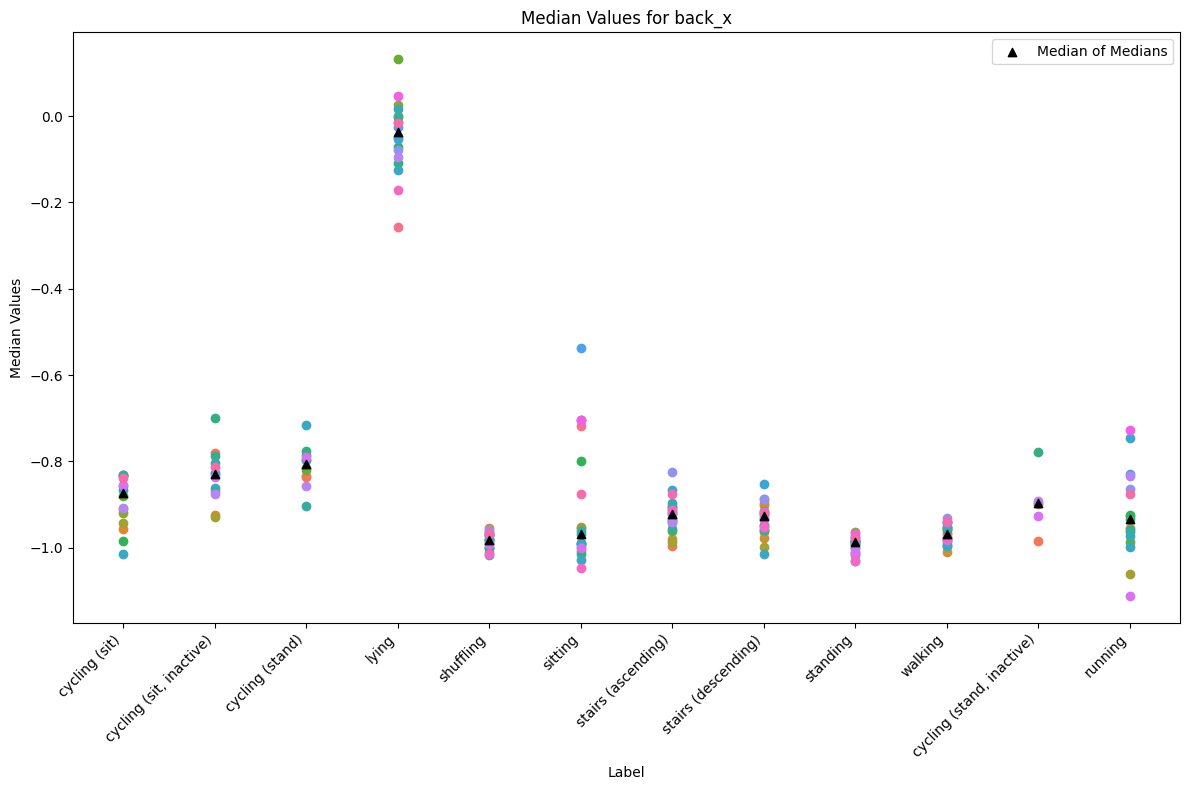

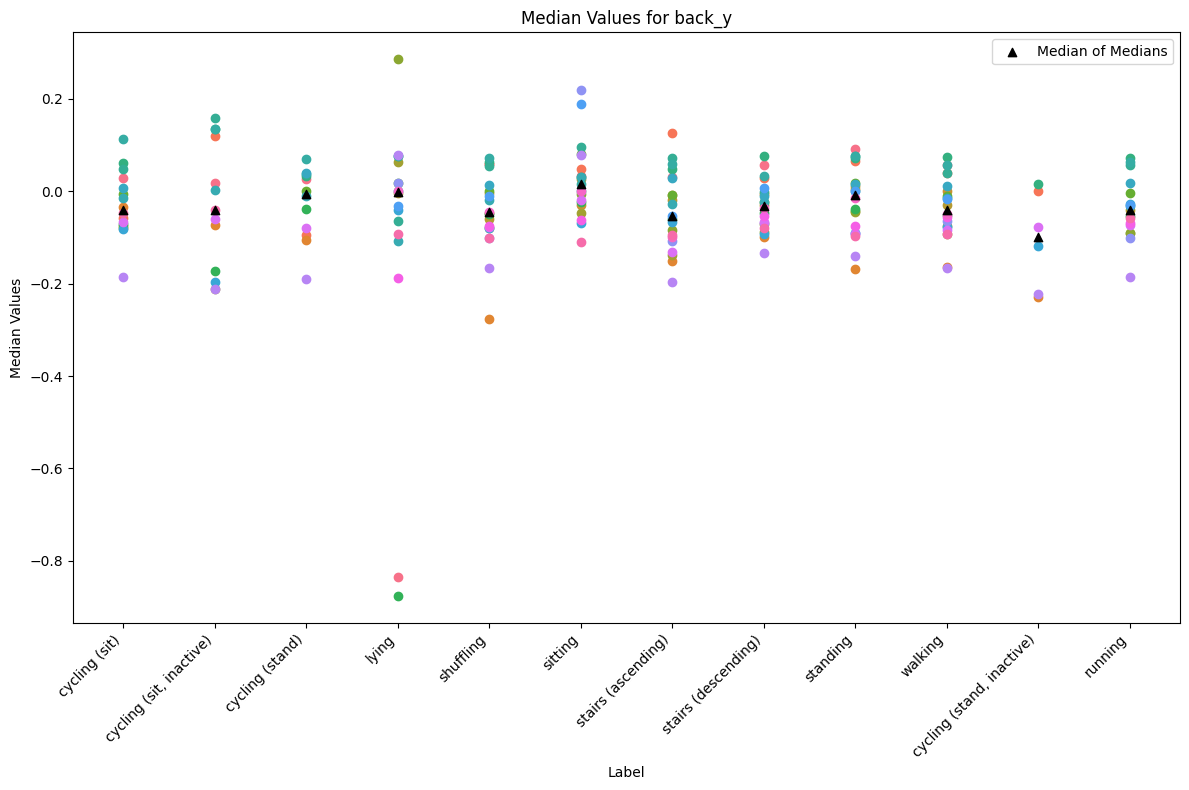

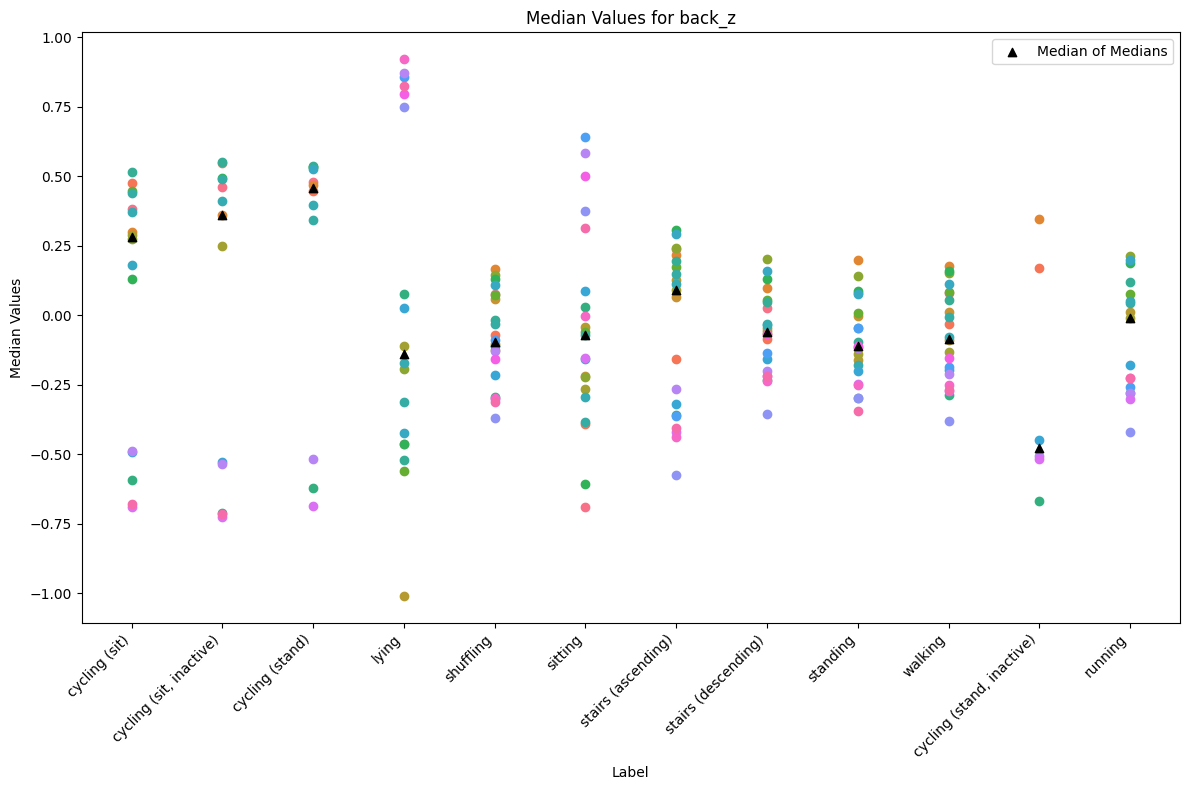

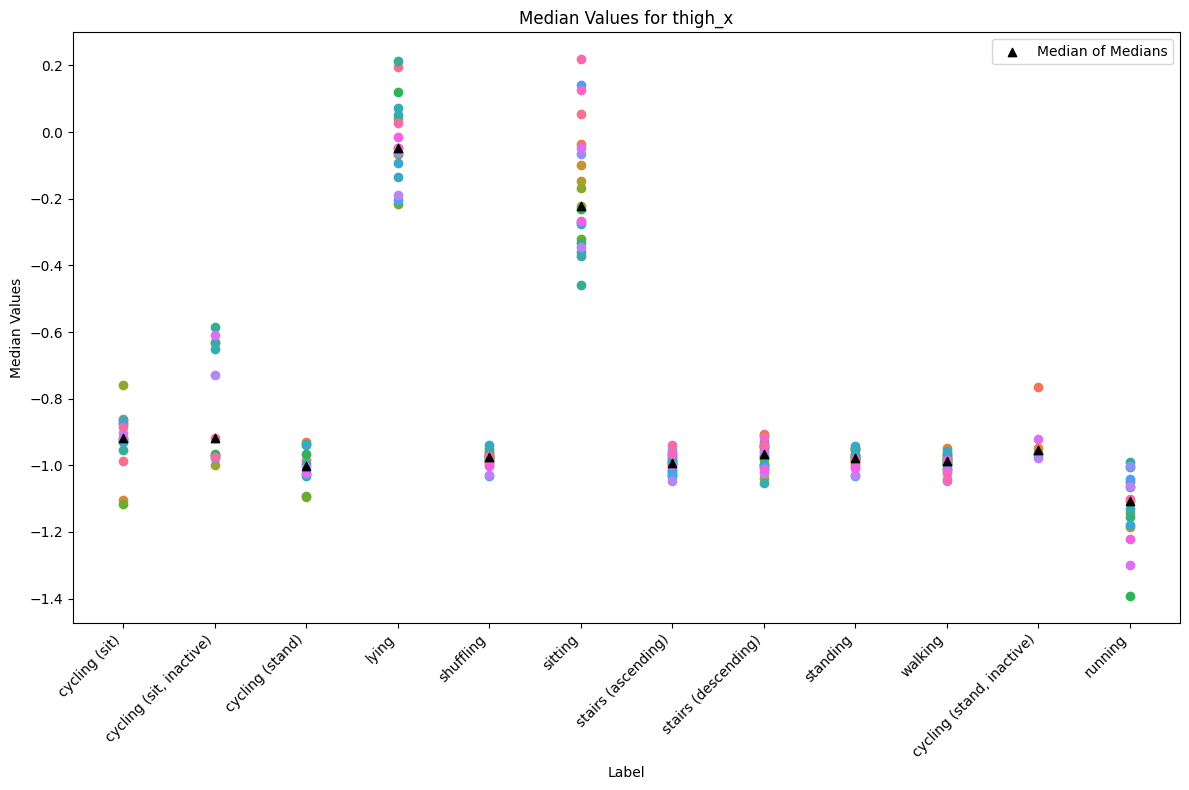

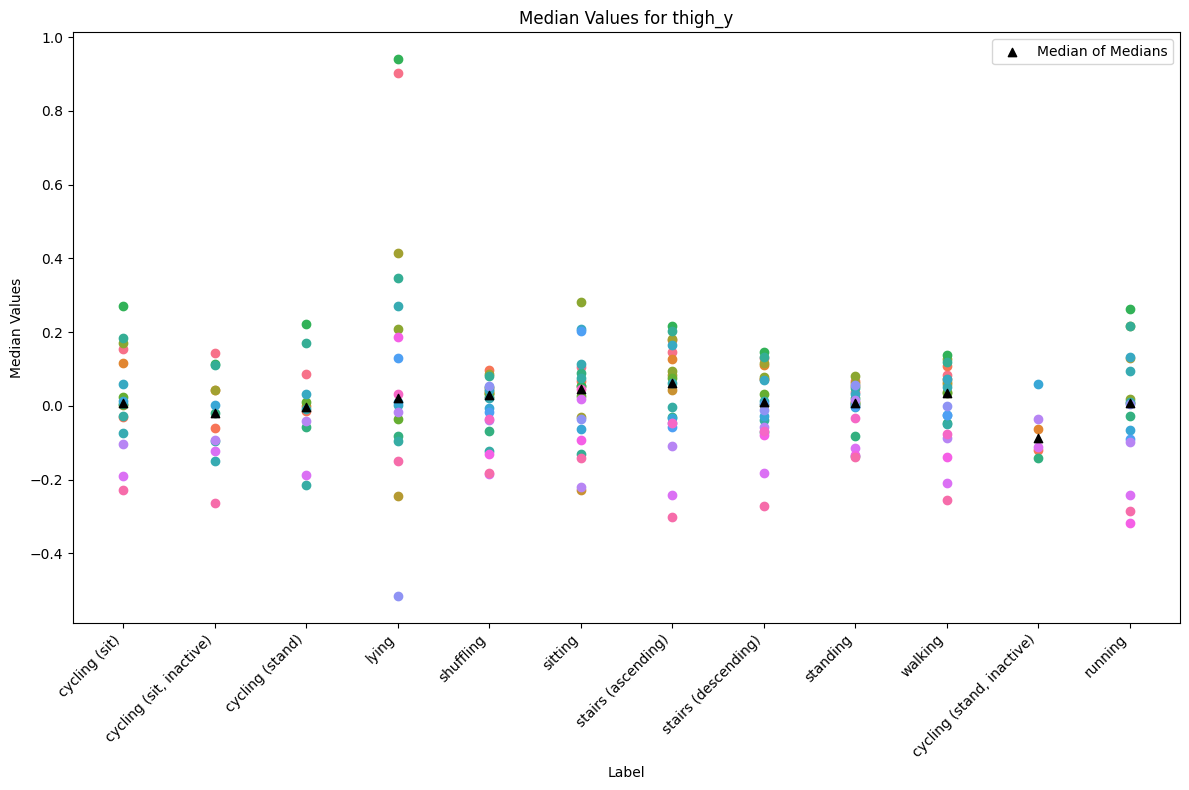

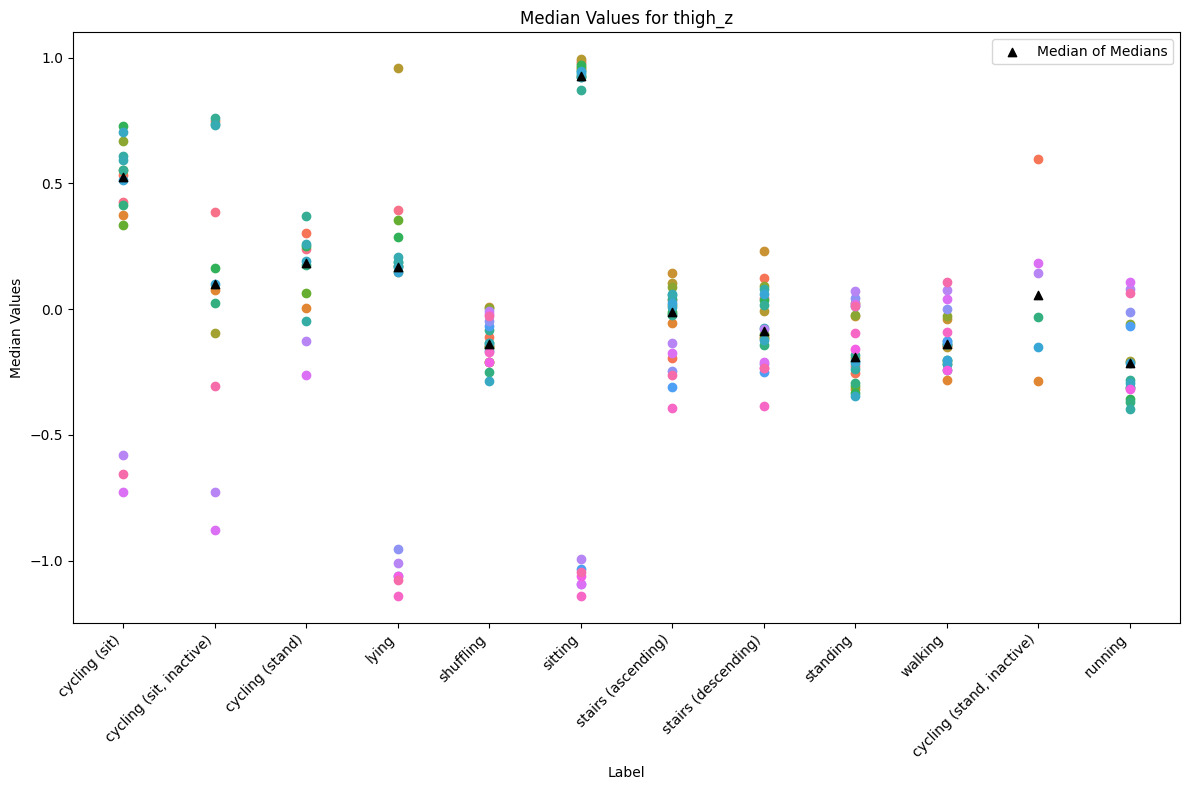

In [2]:
# Get a list of all CSV files in a directory
csv_files = glob.glob('harth2/*.csv')
# Define the labels dictionary
labels = {1: "walking", 2: "running", 3: "shuffling", 4: "stairs (ascending)",
          5: "stairs (descending)", 6: "standing", 7: "sitting", 8: "lying",
          13: "cycling (sit)", 14: "cycling (stand)", 130: "cycling (sit, inactive)", 140: "cycling (stand, inactive)"}
# Define a color palette with enough colors for the number of CSV files
colors = sns.color_palette('husl', len(csv_files))

# Iterate through each column
for column in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
    plt.figure(figsize=(12, 8))

    # Define a list to store the medians grouped by label
    grouped_medians = {label: [] for label in labels.values()}

    # Iterate through each CSV file
    for idx, csv_file in enumerate(csv_files):
        # Read the CSV file
        df = pd.read_csv(csv_file)
        
        # Group the data by 'label' and calculate the median for the current column
        median_df = df.groupby('label')[column].median().reset_index()
        median_df['label'] = median_df['label'].map(labels)
        median_df = median_df.sort_values(by='label')  # Sorting by label
        
        # Append the median values to the list for each label
        for label, median in zip(median_df['label'], median_df[column]):
            grouped_medians[label].append(median)

        # Plot median values for the current column and CSV file
        plt.scatter(median_df['label'], median_df[column], color=colors[idx])

    # Calculate the median of medians for each label
    median_of_medians = {label: pd.Series(medians).median() for label, medians in grouped_medians.items()}

    # Plot the median of medians for each label
    plt.scatter(median_of_medians.keys(), median_of_medians.values(), marker='^', color='black', label='Median of Medians')

    # Add title, labels, and legend
    plt.title(f"Median Values for {column}")
    plt.xlabel('Label')
    plt.ylabel('Median Values')
    plt.xticks(rotation=45, ha='right')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Average Values

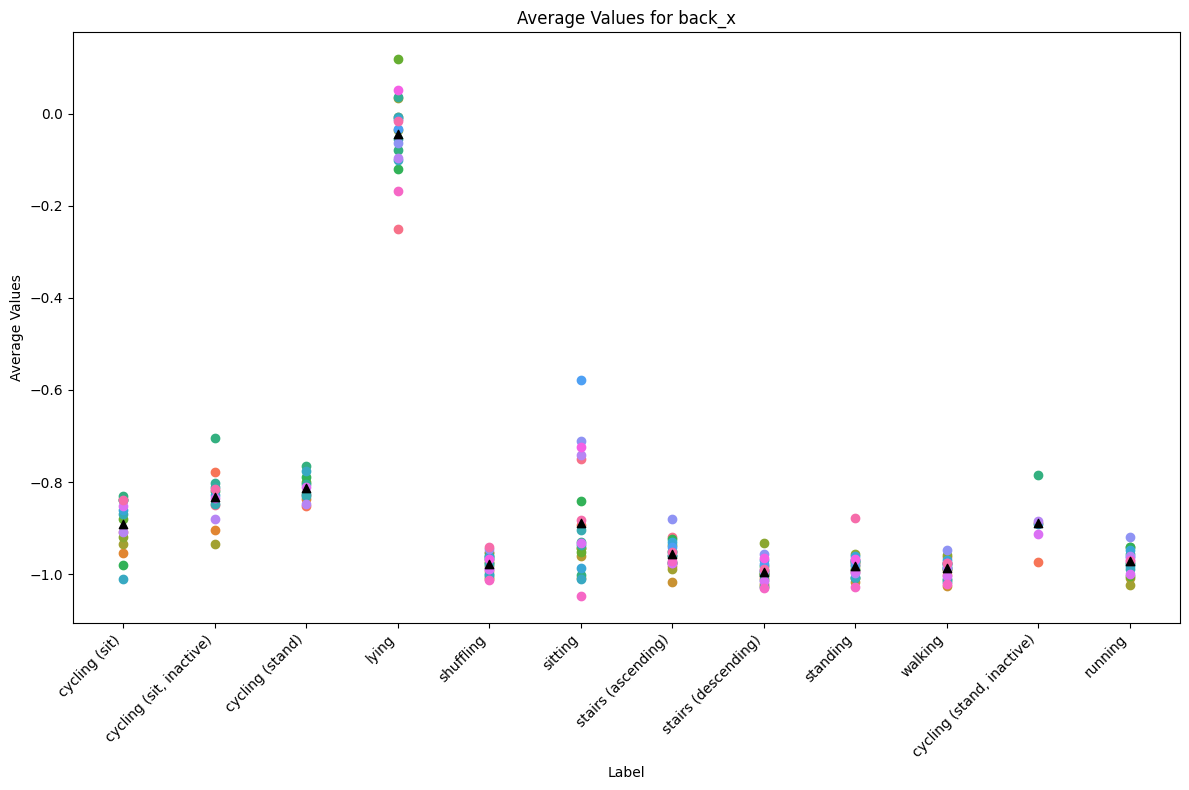

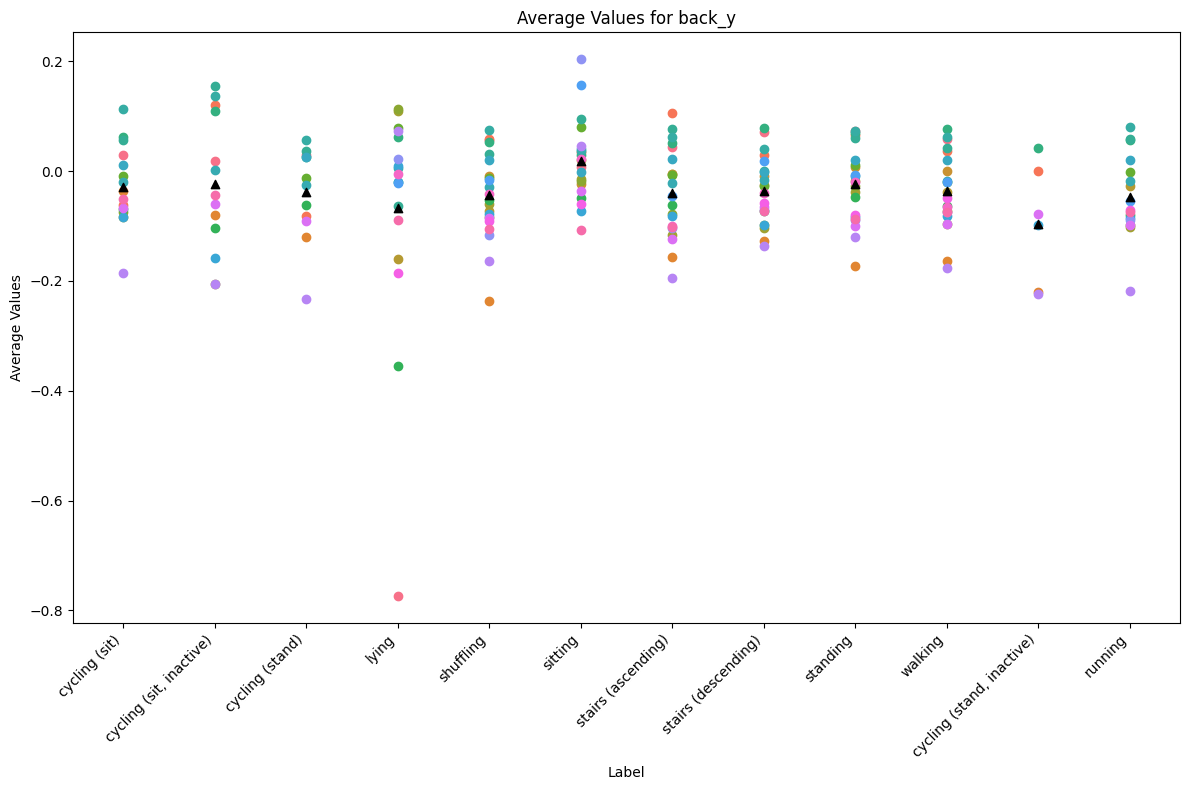

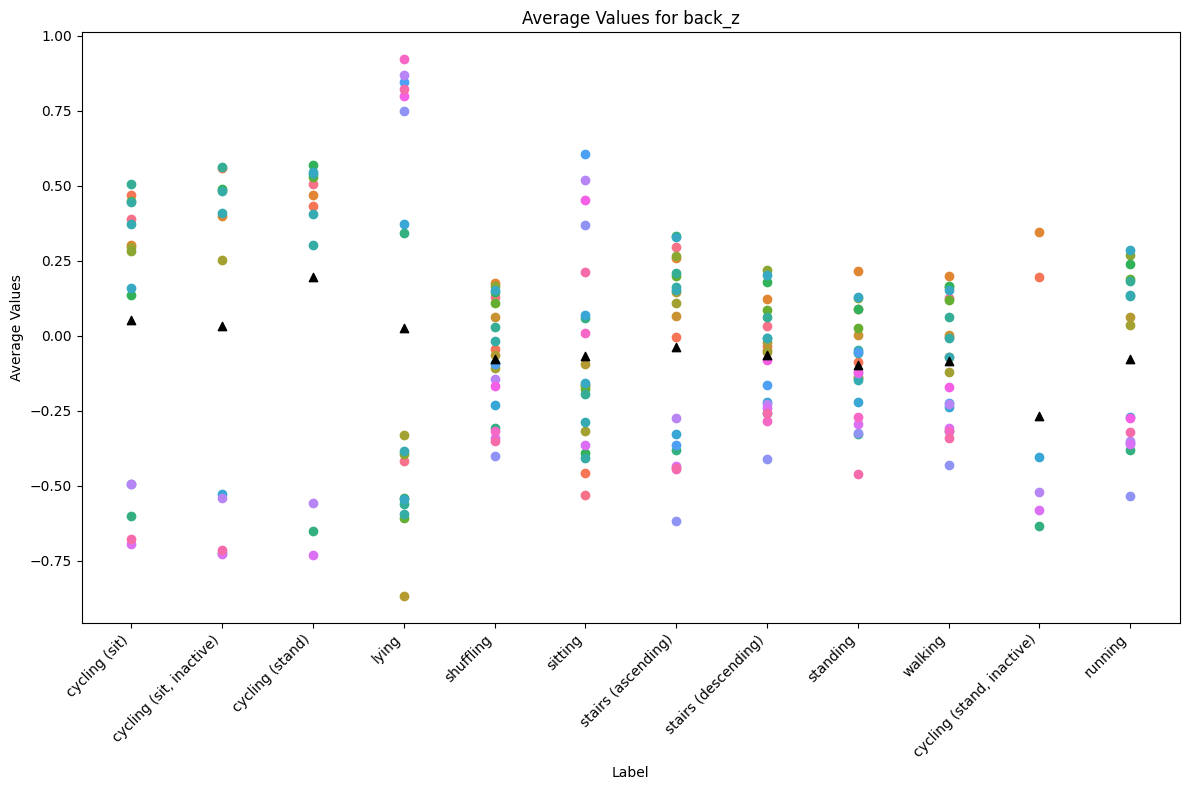

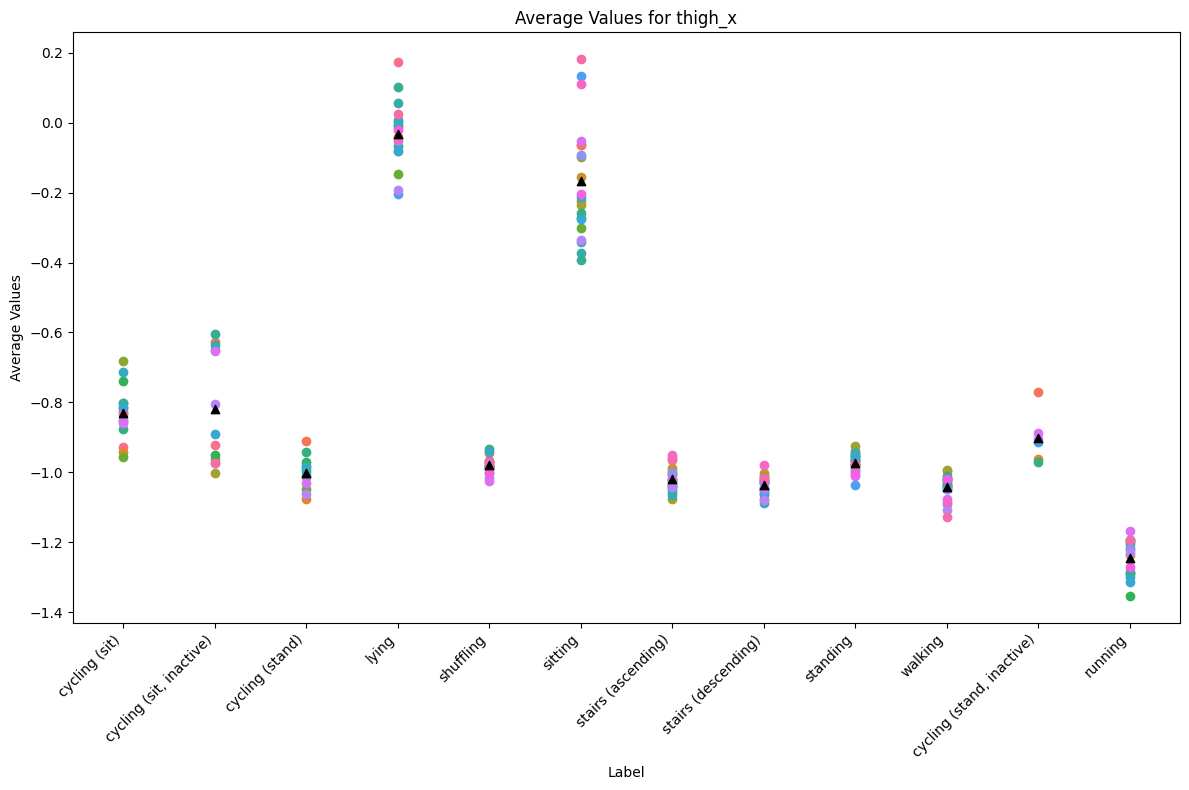

In [ ]:
# Get a list of all CSV files in a directory
csv_files = glob.glob('harth/*.csv')

# Define the labels dictionary
labels = {1: "walking", 2: "running", 3: "shuffling", 4: "stairs (ascending)",
          5: "stairs (descending)", 6: "standing", 7: "sitting", 8: "lying",
          13: "cycling (sit)", 14: "cycling (stand)", 130: "cycling (sit, inactive)", 140: "cycling (stand, inactive)"}

# Define a color palette with enough colors for the number of CSV files
colors = sns.color_palette('husl', len(csv_files))

# Iterate through each column
for column in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
    plt.figure(figsize=(12, 8))
    
    # Define a list to store the averages values grouped by label
    grouped_means = {label: [] for label in labels.values()}

    # Iterate through each CSV file
    for idx, csv_file in enumerate(csv_files):
        # Read the CSV file
        df = pd.read_csv(csv_file)
        mean_df = df.groupby('label')[column].mean()  # Calculate the mean instead of median
        mean_df = mean_df.reset_index()  # Resetting the index to access the 'label' column
        mean_df['label'] = mean_df['label'].map(labels)
        mean_df = mean_df.sort_values(by='label')  # Sorting by label

        # Append the median values to the list for each label
        for label, mean in zip(mean_df['label'], mean_df[column]):
            grouped_means[label].append(mean)

        # Plot average values for the current column and CSV file
        plt.scatter(mean_df['label'], mean_df[column], color=colors[idx])
        
    # Calculate the mean of means for each label
    mean_of_means = {label: pd.Series(mean).mean() for label, mean in grouped_means.items()}

    # Plot the median of medians for each label
    plt.scatter(mean_of_means.keys(), mean_of_means.values(), marker='^', color='black', label='Mean of Means')

    # Add title, labels, and legend
    plt.title(f"Average Values for {column}")
    plt.xlabel('Label')
    plt.ylabel('Average Values')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()